# Markowitz model
***

THE BASICS<br>
This model is the basis for diversifying a portfolio to maximise returns and minimise risk<br>
aka The optimal portfolio<br>

> Owning several stocks vs owning just one stock <br>
Investor or portfolio manager can enter into Long and Short positions

Terminology <br>
Long position - When an assets value is expected to increase a long position is entered <br>
Short poistion - When an assets value is expected to decrease a long position is entered



The model's main assumptions are:
1. Returns are normally distributed (Mean(µ) and Variance(σ))
2. Investors are risk averse (Investors wont take on more risk without maximising returns)

Key concepts:
> Low risk | Low return &<br> Higher risk | Higher return

This model focuses on achieving the optimal return for a given level of risk (visa verse)

NB! It is important to normalise a return by calculating the natural logirithmic return <br>
Basis for this is in complexity theory. The easy method for checking if returns have been normalised is to plot values on a histogram. The shape plotted should resemble a gausian bell shaped curve.

### Important factors
Expected return - the mean of historical returns of a given stock<br>
> In context of a portfolio - Weighted average of returns for a given portfolio<br>

Covariance - The degree of random behaviour between different assets<br>
> In context of a portfolio - covariance of 0 is desirable so that correlation (positive or negative) between stocks in a portfolio is eliminated 

##### Efficient frontier<br>
This describes those portfolios which represent the maximum returns for various levels of risk given a set number of stocks <br>

##### Sharp ratio<br>
The ratio between expected portfolio return and level of associated risk.<br>
The most optimal point is where additional return is maximised for level of risk and thus any additional return is not justified for the level of risk associated with that additional return. 

##### Capital Allocation line<br>
Describes the most efficient portfolio combinations of risk-free assets and risky assets given their returns and risks. 

NB! Adjusted closeing price is prefered for financial modeling as it is the closing price adjusted for additional factors which impacts price not included in the nominal closing price (Examples of adjustment factors are dividends and stock splits)

# Coding the Theory - A practical example

### Get time series data 
***
###### I chose Quandl to get data from for stocks that interest me -> https://www.quandl.com/ <- you must register to get your secret_key
###### if you dont have the quandl library then use this in your cmd "pip install quandl"

In [1]:
# Using Quandl Library to draw data from their API
import quandl
quandl.ApiConfig.api_key = "secret key"

# Import data utility libraries
import pandas as pd
import numpy as np

# Import visualisation library
import matplotlib.pyplot as plt
#For using matplotlibs inline backend displaying and retaining plat in the frontend notebook
%matplotlib inline 

#Import Scipy Optimization library
import scipy.optimize as opt


In [2]:
# Building a dataframe with the following stocks (Netflix, Nvidia, Exxon Mobil, Tesla, )
stocks = ["NFLX","NVDA", "XOM", "TSLA"]
data = quandl.get_table("WIKI/PRICES", ticker = stocks, date={'gte':'2010-04-01', 'lte':'2020-03-31'}, paginate=True)

In [3]:
# Quick check of the data
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,XOM,2018-03-27,74.00,74.8949,73.2750,73.70,14625541.0,0.0,1.0,74.00,74.8949,73.2750,73.70,14625541.0
1,XOM,2018-03-26,73.65,74.1500,72.7548,74.00,14894438.0,0.0,1.0,73.65,74.1500,72.7548,74.00,14894438.0
2,XOM,2018-03-23,73.81,74.2100,72.6700,72.89,19069634.0,0.0,1.0,73.81,74.2100,72.6700,72.89,19069634.0
3,XOM,2018-03-22,74.42,74.7000,73.3900,73.50,17118037.0,0.0,1.0,74.42,74.7000,73.3900,73.50,17118037.0
4,XOM,2018-03-21,74.23,75.6400,73.9800,75.04,14813757.0,0.0,1.0,74.23,75.6400,73.9800,75.04,14813757.0


### Wrangle the data
***
###### Be mindful of assigning specific data to unique variable names so you can preserve that data for later use.

In [5]:
# Extract and pivot the adjusted closing prices for each stock 

df = data.pivot(index='date', columns='ticker', values='adj_close')

# NB! the data only returns to 21 March 2018 which is less than the 10 years of our original call

df.tail()

ticker,NFLX,NVDA,TSLA,XOM
date,,,,
2018-03-21,316.48,248.56,316.53,75.04
2018-03-22,306.70,241.85,309.10,73.50
2018-03-23,300.94,232.97,301.54,72.89
2018-03-26,320.35,244.48,304.18,74.00
2018-03-27,300.69,225.52,279.18,73.70


In [7]:
# Then calculate logirithmic daily return

returns = df.pct_change().apply(lambda x : np.log(x+1))
returns.tail()


ticker,NFLX,NVDA,TSLA,XOM
date,,,,
2018-03-21,-0.003218,-0.004095,0.019073,0.014091
2018-03-22,-0.031390,-0.027367,-0.023753,-0.020736
2018-03-23,-0.018959,-0.037408,-0.024762,-0.008334
2018-03-26,0.062503,0.048224,0.008717,0.015114
2018-03-27,-0.063334,-0.080725,-0.085763,-0.004062


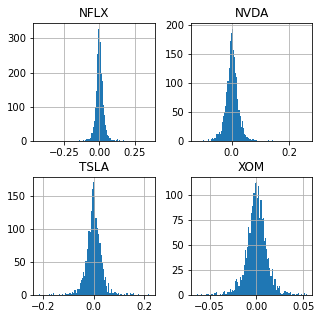

In [18]:
# Check if data conforms to Gaussian Distribution (Bell shaped distribution)
returns.hist(figsize=(5,5),bins=100,sharex=False )
plt.show()

### Analysis and optimisation of a portfolio containing the selected stocks

In [9]:
# Calculate mean and build the covariance matrix (based on 252 trading days per annum)
print("Stats\n")
print("Average annual percentage returns of the data")
print(returns.mean()*252*100,"\n")
print("Standard deviations (Annualised)")
print(returns.std()*np.sqrt(252),"\n")
print("Variances")
print(returns.var()*252,'\n')
print("Covariance Matrix")
print(returns.cov()*252)

Stats

Average annual percentage returns of the data
ticker
NFLX    41.826504
NVDA    33.204907
TSLA    31.802669
XOM      3.973046
dtype: float64 

Standard deviations (Annualised)
ticker
NFLX    0.541114
NVDA    0.389172
TSLA    0.502787
XOM     0.184003
dtype: float64 

Variances
ticker
NFLX    0.292804
NVDA    0.151455
TSLA    0.252794
XOM     0.033857
dtype: float64 

Covariance Matrix
ticker      NFLX      NVDA      TSLA       XOM
ticker                                        
NFLX    0.292804  0.051705  0.059456  0.015420
NVDA    0.051705  0.151455  0.050162  0.022859
TSLA    0.059456  0.050162  0.252794  0.020330
XOM     0.015420  0.022859  0.020330  0.033857


In [10]:
# Initial weights at random
weights = np.random.random(len(returns.columns))
weights/=np.sum(weights)
weights

array([0.45346103, 0.3562271 , 0.18037244, 0.00993943])

In [11]:
# Calculate portfolio returns using the initialised weights
portfolio_returns = np.sum(returns.mean()*weights)*252
print("Expected annualised portfolio returns:", portfolio_returns, '\n')

# Calculate portfolio variance
portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
print("Expected annualised portfolio variance:", portfolio_variance)


Expected annualised portfolio returns: 0.36570992478484243 

Expected annualised portfolio variance: 0.3477152571436471


###### Monte-Carlo simulation -> generating many random portfolios 
***
This is a process of finding the optimal weights to achieve the most returns for the lowest amount of risk.

In [12]:
# Applying the simulation in a deterministic fasion to build lists of returns and associated risk (variances)
aggragated_pf_returns = []
aggragated_pf_variances = []
for i in range(10000):
    sim_weights = np.random.random(len(returns.columns))
    sim_weights/=np.sum(sim_weights)
    aggragated_pf_returns.append(np.sum(returns.mean()*sim_weights)*252)
    aggragated_pf_variances.append(np.sqrt(np.dot(sim_weights.T, np.dot(returns.cov()*252,sim_weights))))
sim_aggragated_pf_returns = np.array(aggragated_pf_returns)
sim_aggragated_pf_variances = np.array(aggragated_pf_variances)


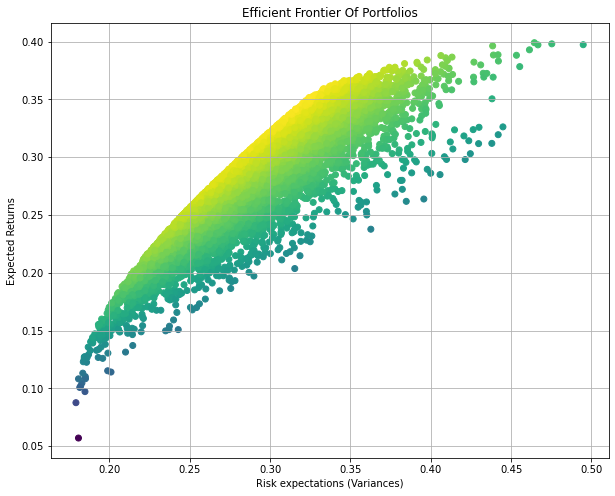

In [16]:
# Plot simulation results also known as the Efficient Frontier
plt.figure(figsize=(10,8))
plt.scatter(sim_aggragated_pf_variances, sim_aggragated_pf_returns,
            c=sim_aggragated_pf_returns/sim_aggragated_pf_variances,
           marker="o")
plt.grid(True)
plt.xlabel("Risk expectations (Variances)")
plt.ylabel("Expected Returns")
plt.title("Efficient Frontier Of Portfolios")
plt.show()